# Credit Card Fraud Detection

In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## Data Analysis 

In [65]:
train_data = pd.read_csv("fraudTrain.csv") # Read 
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [66]:
# Looking at data types

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [67]:
# Look at basic statistical description of Data

train_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [68]:
# Looking at sellers job categories

train_data["category"].value_counts() # Will be label encoded!

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [69]:
# Value count of target

train_data["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

- Highly unbalanced data!

### Pie Chart of Target Classes!

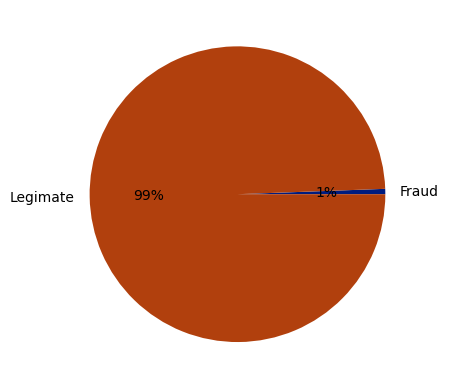

In [70]:
# Pie Chart of Target Classes!

fraud_positive = len(train_data[train_data["is_fraud"] == 1])
fraud_negative = len(train_data[train_data["is_fraud"] == 0])

fraud_count = {"Fraud": fraud_positive, "Legimate": fraud_negative}

pal_color = sns.color_palette('dark')

plt.pie(fraud_count.values(), labels = fraud_count.keys(), colors=pal_color, autopct='%.0f%%')

plt.show()

C:\Users\gulse\AppData\Local\Temp\ipykernel_19788\249978171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud',data=train_data,palette=pal)


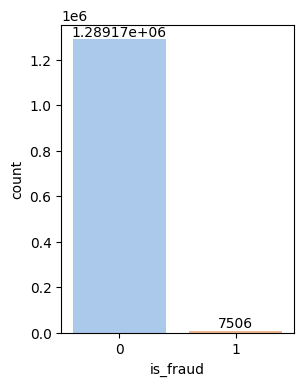

In [71]:
plt.figure(figsize=(3,4))
pal = "pastel"
ax = sns.countplot(x='is_fraud',data=train_data,palette=pal)
for i in ax.containers:
    ax.bar_label(i,)

### Correlation of Dataset


In [72]:
# Correlations of the features

corr = train_data.corr(numeric_only=True)

#### Sns Heatmap

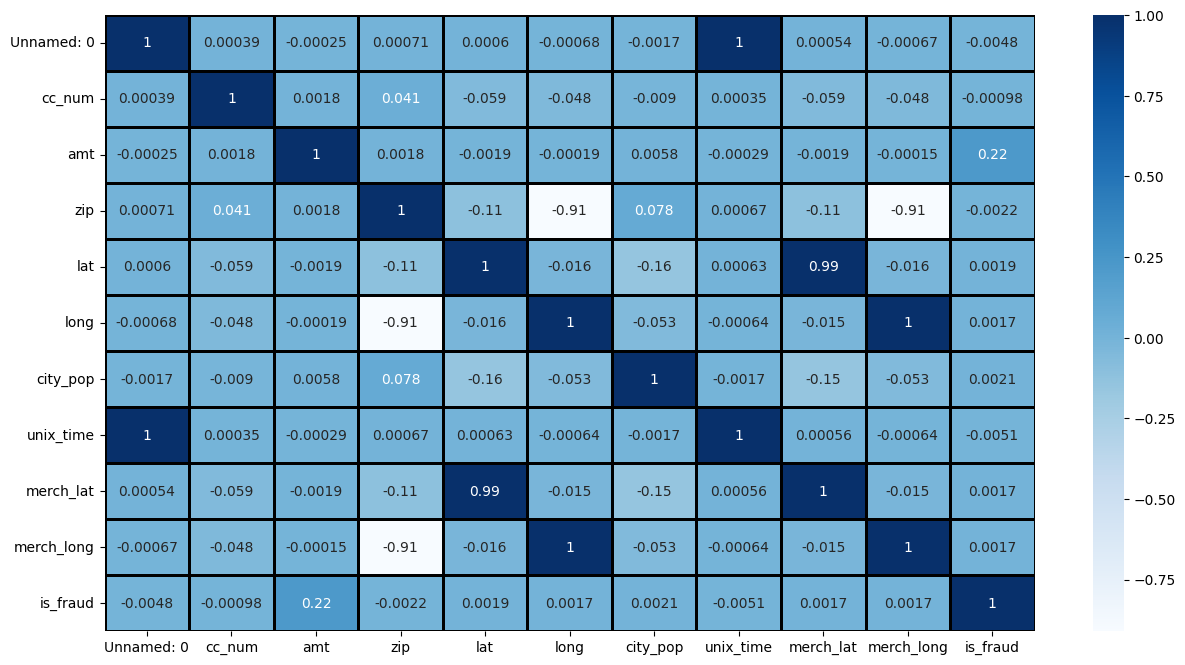

In [73]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="Blues", linecolor="black", linewidths=2)
plt.show()

### Checking For Duplicated Data

In [74]:
train_data.duplicated().any() # Checking for Duplicated Data.

False

### Dropping unneeded Columns

In [75]:
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
train_data.drop(columns=unused_cols,inplace=True)


### Outliers 

#### Dealing with outliers

In [76]:
from collections import Counter
def IQR(df: pd.DataFrame, n):
    columns = df.select_dtypes(include=np.number).columns
    
    outliers = []
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        # identify outliers
        threshold = 1.5
        outlier_list_col = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outliers.extend(outlier_list_col)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outliers)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [77]:
# detecting outliers
Outliers_IQR = IQR(train_data,1,)

# dropping outliers
df_out = train_data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 7506


C:\Users\gulse\AppData\Local\Temp\ipykernel_19788\805499457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud',data=df_out,palette="pastel")


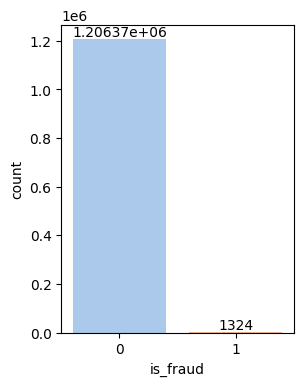

In [78]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

## Model Training

In [79]:
X = train_data.drop("is_fraud", axis=1)
y = train_data["is_fraud"]



### Train Test Split

In [80]:
fraud_rows = train_data.query("is_fraud == 1")
legimate_rows = train_data.query("is_fraud == 0").iloc[: len(fraud_rows)]

fraud_rows.shape , legimate_rows.shape

((7506, 11), (7506, 11))

In [81]:
a = pd.concat([fraud_rows, legimate_rows])

a.shape

(15012, 11)

### Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

a["category"] = le.fit_transform(a["category"])
a["cc_num"] = le.fit_transform(a["cc_num"])

### Dealing with time

In [83]:
a['trans_date_trans_time']=pd.to_datetime(a['trans_date_trans_time'])
a['trans_day']=a['trans_date_trans_time'].dt.day
a['trans_month']=a['trans_date_trans_time'].dt.month
a['trans_year']=a['trans_date_trans_time'].dt.year
a['trans_hour']=a['trans_date_trans_time'].dt.hour
a['trans_minute']=a['trans_date_trans_time'].dt.minute
a.drop(columns=['trans_date_trans_time'],inplace=True)

### Feature Scaling


In [84]:

scaler=StandardScaler()
a['amt']=scaler.fit_transform(a[['amt']])
a['zip']=scaler.fit_transform(a[['zip']])
a['city_pop']=scaler.fit_transform(a[['city_pop']])


In [85]:
X = a.drop("is_fraud", axis=1)
y = a["is_fraud"]

In [86]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


## Model Training

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
history = model.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
y_pred = model.predict(X_test)

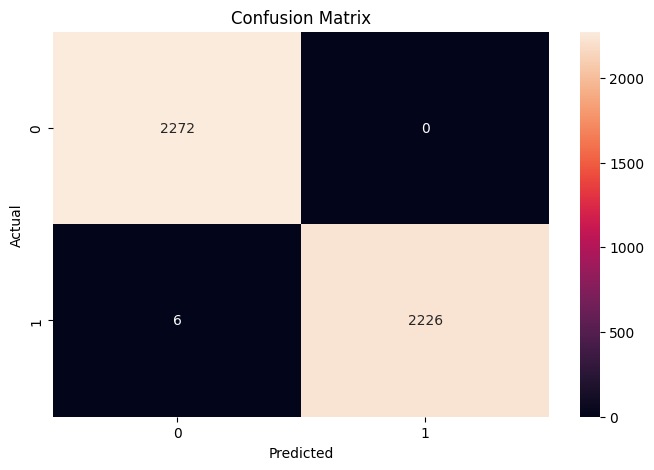

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, recall_score, precision_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [100]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

Accuracy: 0.9986678507992895
Precision: 1.0
Recall: 0.9973118279569892
F1 score: 0.9986541049798116


In [101]:
print("Classification Report\n", classification_report(y_pred, y_test))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2278
           1       1.00      1.00      1.00      2226

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504



### Notes 

- Hyperparameter tunining can be done if needed!